In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
bike = pd.read_csv("C:/Users/sreeh/OneDrive/Desktop/Assignment Boombikes/day.csv")

In [5]:
# Checking the top 5 rows of the dataframe
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#Checking the shape of the dataframe 
bike.shape

(730, 16)

In [7]:
# Checking the size of the dataframe
bike.size

11680

In [8]:
# How many types of each data type column exists and total memory usage
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [9]:
# Checking the numerical columns data distribution statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Creating a copy of original dataframe for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

<function matplotlib.pyplot.show(*args, **kw)>

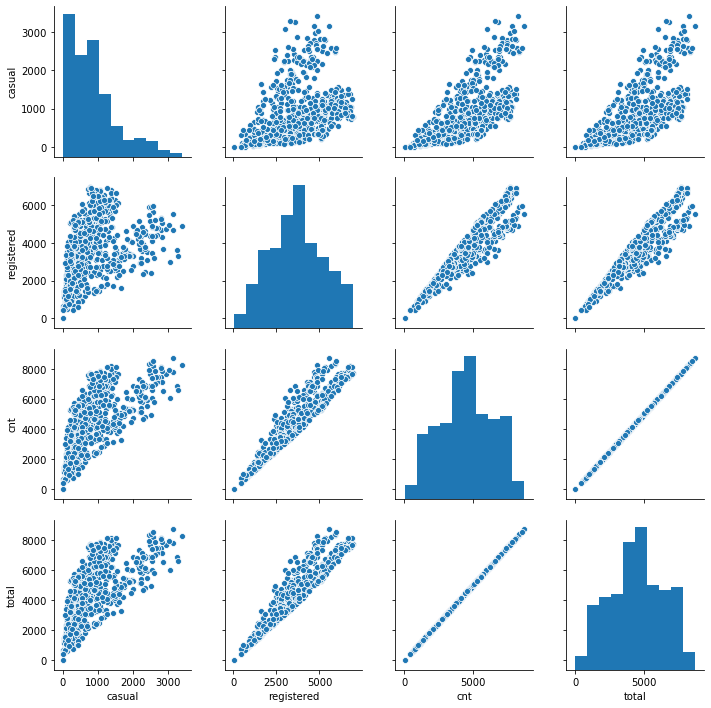

In [12]:
# Checking the relationship between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

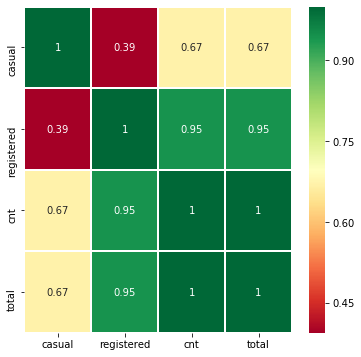

In [13]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [14]:
# So based on the above analysis of the data and its dictionary, the following features can be dropped
# Since the objective is to find the total number of bikes, "casual" and "registered" can be dropped. cnt = "casual" and "registered"
# "dteday" since it has only dates. There are separate features defining the same.
# "instant" as it is just an index number.

In [15]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

In [16]:
### Converting to Categorical Column

In [17]:
#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [19]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr',
                                                'May','Jun','Jul','Aug',
                                                'Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

Dec    0.084932
Oct    0.084932
Jul    0.084932
Mar    0.084932
Aug    0.084932
May    0.084932
Jan    0.084932
Jun    0.082192
Sep    0.082192
Nov    0.082192
Apr    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [20]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [21]:
#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Monday       0.143836
Tuesday      0.143836
Friday       0.142466
Sunday       0.142466
Wednesday    0.142466
Thursday     0.142466
Saturday     0.142466
Name: weekday, dtype: float64

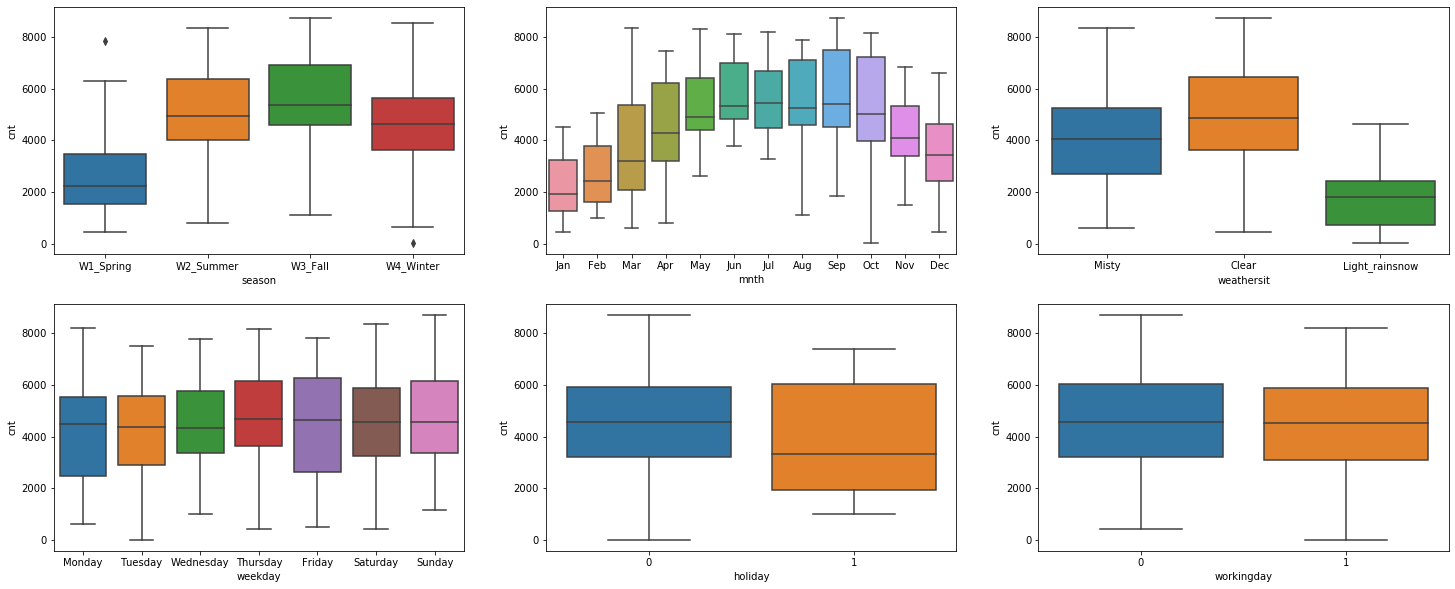

In [22]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [23]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [24]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [25]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


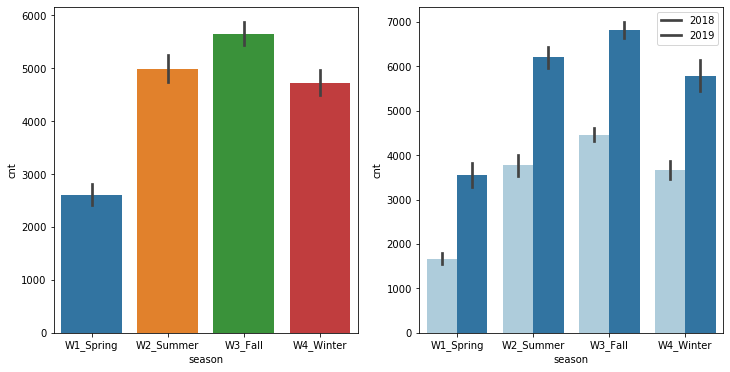

In [26]:
categorical_plot('season',12,6)

In [27]:
# Observation from the above analysis shows that most of the booking are happening in the seaon Fall with a median of over 5000 for 2 years followed by Summer and Winter.
# The Feature "Season" can be considered as a good dependant variable

In [28]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


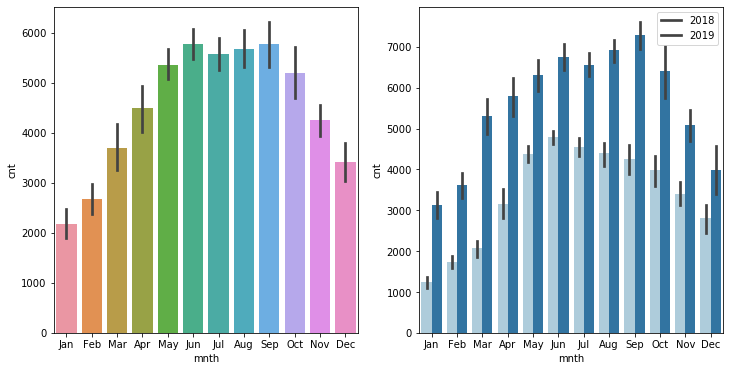

In [29]:
categorical_plot('mnth',12,6)

In [30]:
# In this analysis we could see that the majority of the booking has happened between May to September month. This alo shows that months can be considered as good predictor for the dependant variable.

In [31]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


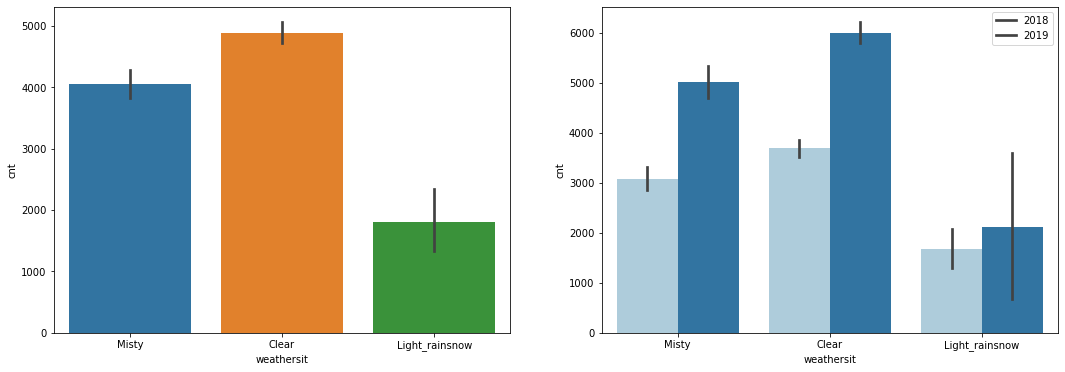

In [32]:
categorical_plot('weathersit',18,6)

In [33]:
# 68.61% of bookings have happened on clear days. This variable is definitly a factor to be considered.

In [34]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


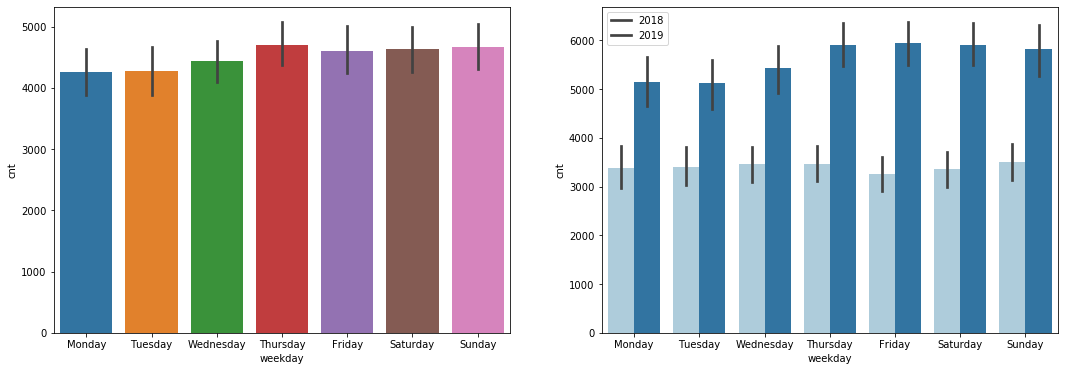

In [35]:
categorical_plot('weekday',18,6)

In [36]:
# Looks like the trends are very close to each other and the mean ranged closely between 4200 - 4700. 
# This variable may have a little inflence or no influence at all. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection

In [37]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


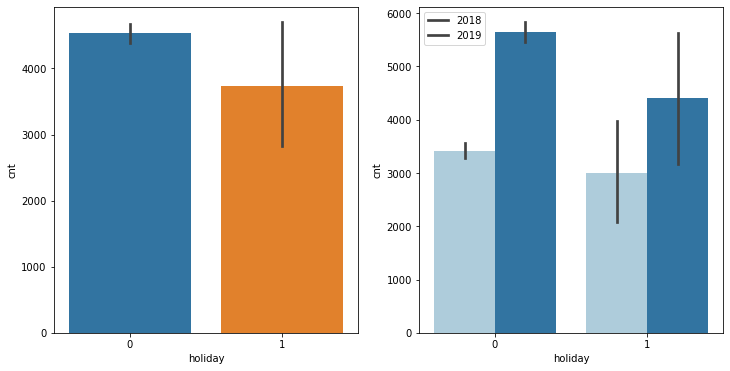

In [38]:
categorical_plot('holiday',12,6)

In [39]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


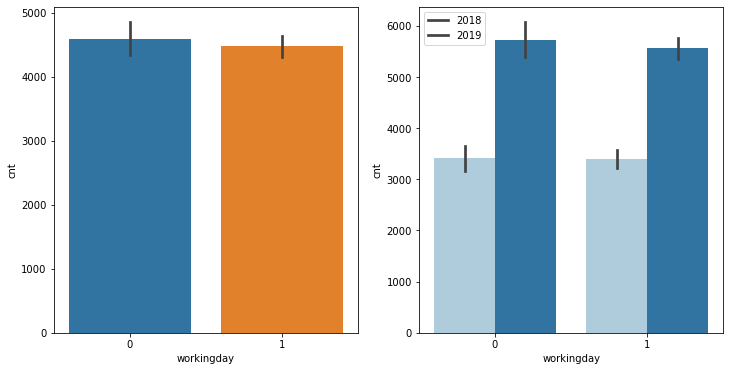

In [40]:
categorical_plot('workingday',12,6)

In [41]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


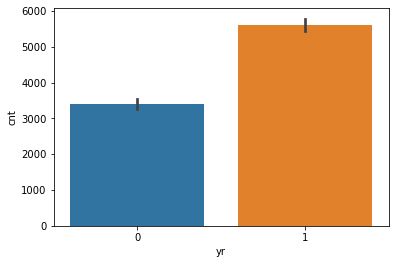

In [42]:
sns.barplot('yr','cnt',data=bike)
plt.show()

In [43]:
# Holidays - Almost 97% of bike rentals are happening during non-holiday time.
# Working Days - This can act as a very good predictor for the variables with close to 69% of bookings
# Years - Bookings have gone up from 2018 to 2019.

In [44]:
### Numerical Variable Analysisi=

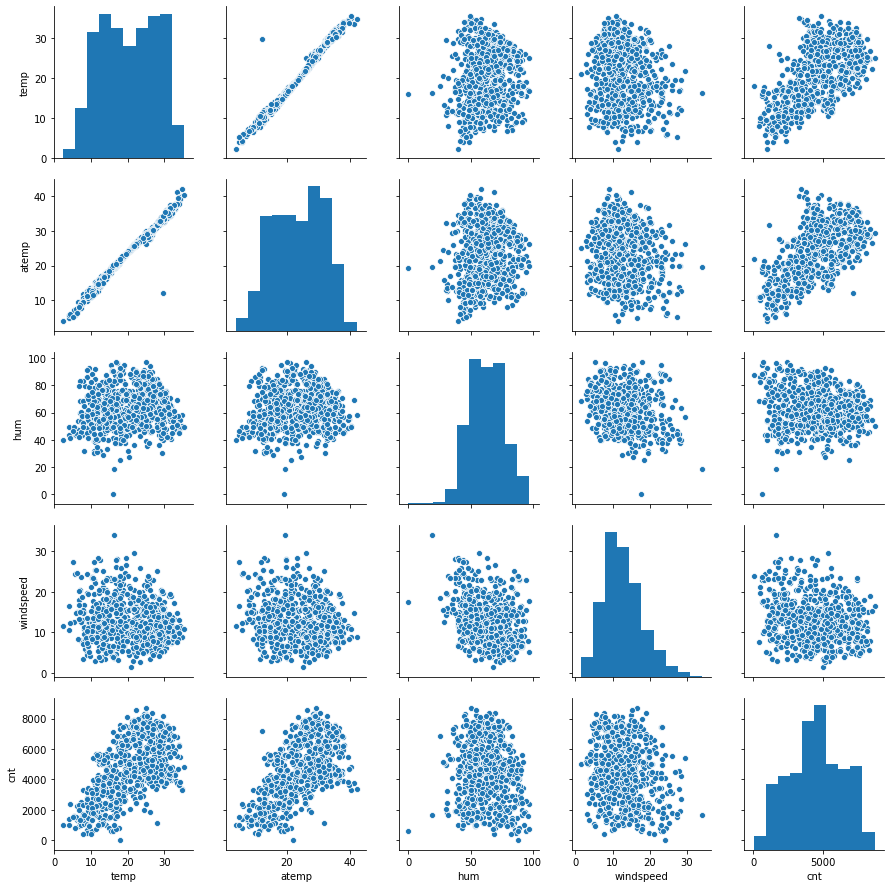

In [45]:
#Generating pairplot to check the relationships between numeric variables variables
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

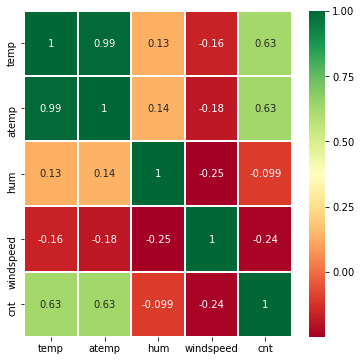

In [46]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

In [47]:
# Observation - Even though temp and atemp are having Linear Relationship, both cannot be used in the model because of their multicolinearity.
# The parameters needs to be decided on VIF and p-value with respect to other variables.

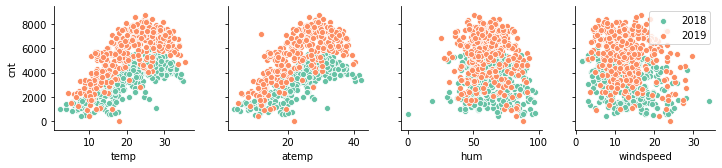

In [48]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

In [50]:
# Season

season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0


In [51]:
# Weather

weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


In [52]:
# Month

month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Weekday

weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1


In [54]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,W1_Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,W1_Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1


In [55]:
bike_new.shape

(730, 34)

In [56]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
season            730 non-null object
yr                730 non-null int64
mnth              730 non-null object
holiday           730 non-null int64
weekday           730 non-null object
workingday        730 non-null int64
weathersit        730 non-null object
temp              730 non-null float64
atemp             730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
cnt               730 non-null int64
W2_Summer         730 non-null uint8
W3_Fall           730 non-null uint8
W4_Winter         730 non-null uint8
Aug               730 non-null uint8
Dec               730 non-null uint8
Feb               730 non-null uint8
Jan               730 non-null uint8
Jul               730 non-null uint8
Jun               730 non-null uint8
Mar               730 non-null uint8
May               730 non-null uint8
Nov               730 non-null u

In [57]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [58]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
yr                730 non-null int64
holiday           730 non-null int64
workingday        730 non-null int64
temp              730 non-null float64
atemp             730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
cnt               730 non-null int64
W2_Summer         730 non-null uint8
W3_Fall           730 non-null uint8
W4_Winter         730 non-null uint8
Aug               730 non-null uint8
Dec               730 non-null uint8
Feb               730 non-null uint8
Jan               730 non-null uint8
Jul               730 non-null uint8
Jun               730 non-null uint8
Mar               730 non-null uint8
May               730 non-null uint8
Nov               730 non-null uint8
Oct               730 non-null uint8
Sep               730 non-null uint8
Light_rainsnow    730 non-null uint8
Misty             730 non-null uint8

In [59]:
# Splitting data into Train and Test datasets (80%-20%)

In [65]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.8, random_state = 333)

In [66]:
bike_train.shape

(584, 30)

In [67]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.510274,0.025685,0.691781,20.411206,23.814238,62.342977,12.715394,4558.575342,0.251712,0.267123,...,0.082192,0.085616,0.023973,0.337329,0.140411,0.140411,0.145548,0.140411,0.145548,0.143836
std,0.500323,0.158329,0.462153,7.484088,8.107113,14.310069,5.167713,1945.029296,0.434369,0.442837,...,0.274892,0.280037,0.153095,0.473203,0.347711,0.347711,0.352955,0.347711,0.352955,0.351224
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.033962,17.013237,51.572900,9.041851,3305.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.622549,24.574050,62.312500,12.083316,4572.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.923347,30.556050,72.958300,15.624735,6078.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
bike_test.shape

(146, 30)

In [69]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.458904,0.041096,0.684932,19.951473,23.374654,64.453966,12.956523,4305.732877,0.253425,0.219178,...,0.095890,0.068493,0.047945,0.335616,0.157534,0.150685,0.130137,0.150685,0.136986,0.136986
std,0.500024,0.199195,0.466142,7.611438,8.339871,13.863547,5.320539,1892.558754,0.436469,0.415114,...,0.295454,0.253460,0.214386,0.473831,0.365558,0.358973,0.337612,0.358973,0.345016,0.345016
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.367701,16.058812,53.874975,8.979893,2978.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,19.577500,23.484575,63.604150,12.312221,4351.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.180222,29.870000,73.389975,15.678067,5532.250000,0.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8167.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [71]:
#Dataframe before scaling 
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
155,0,0,1,26.581653,30.84020,65.2500,9.292364,4906,1,0,...,0,0,0,1,0,0,0,0,1,0
697,1,0,1,11.515670,14.92110,55.5652,7.739974,5323,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,0,1,29.144153,33.77625,77.0000,16.666518,3873,0,1,...,0,0,0,0,0,0,0,0,1,0


In [72]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [73]:
#Checking after rescalling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
155,0,0,1,0.734175,0.705849,0.677922,0.239759,0.561896,1,0,...,0,0,0,1,0,0,0,0,1,0
697,1,0,1,0.276298,0.287930,0.577301,0.191993,0.609871,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,0,1,0.812053,0.782928,0.800000,0.466658,0.443051,0,1,...,0,0,0,0,0,0,0,0,1,0


In [74]:
# Correlation Coefficient Analysis

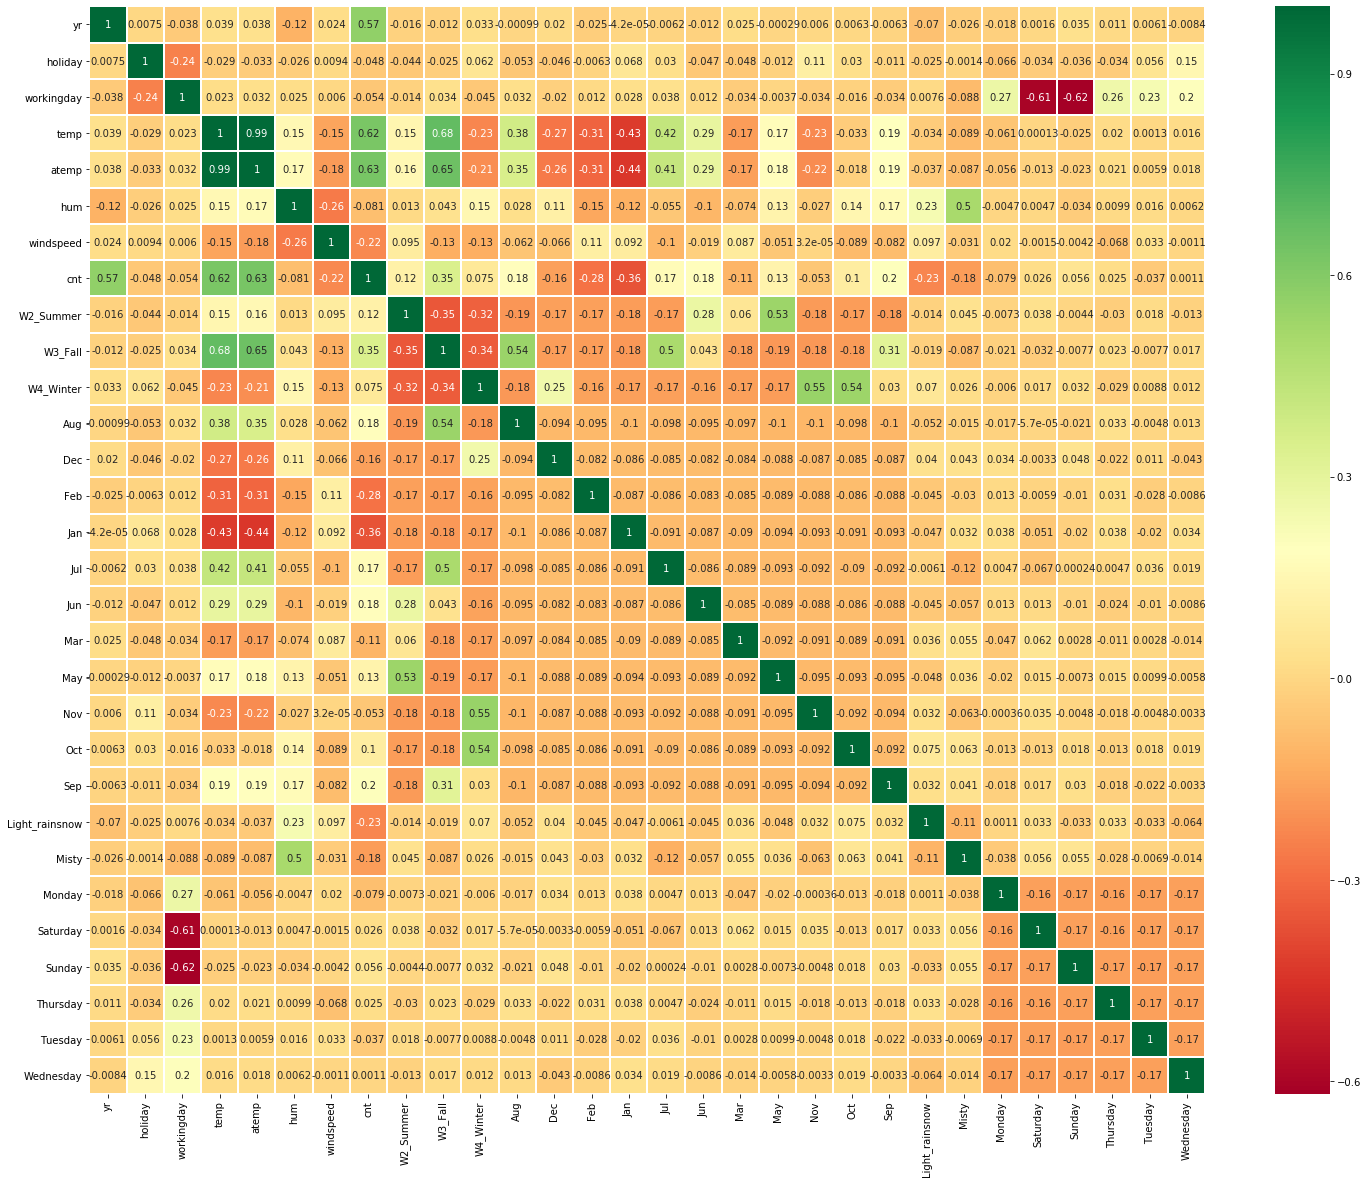

In [75]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [76]:
# Observation - As there are Multi-colinearity between the varibles, following factors needs to be considered while creating a model.
 # Either temp or atemp should be used as they have high correlation value of 0.99
 # Temp, atemp and year has strong correlation with cnt.
 # There is a high negative correlation between Workingday and Saturday-Sunday.
 # Misty and humidity has good correlation.

In [77]:
# Linear Regression Model

# Dividing dataset into X_train and y_train

y_train = bike_train.pop('cnt')
X_train = bike_train

In [78]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [79]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', True, 1),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', False, 4),
 ('Jun', False, 15),
 ('Mar', False, 11),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 2),
 ('Sunday', False, 3),
 ('Thursday', False, 14),
 ('Tuesday', False, 8),
 ('Wednesday', False, 12)]

In [80]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'W2_Summer', 'W3_Fall', 'W4_Winter', 'Dec', 'Nov', 'Sep',
       'Light_rainsnow', 'Misty'],
      dtype='object')

In [81]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [82]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [83]:
# Model development

# Model No.1

# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,430.19
4,atemp,411.53
5,hum,19.10
8,W3_Fall,7.06
6,windspeed,4.66
9,W4_Winter,3.73
7,W2_Summer,3.59
2,workingday,3.46
14,Misty,2.26
0,yr,2.03


In [85]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          9.31e-213
Time:                        10:49:32   Log-Likelihood:                 577.05
No. Observations:                 584   AIC:                            -1122.
Df Residuals:                     568   BIC:                            -1052.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2659      0.026     10.

In [87]:
# Model No.2

# Even though temp and atemp has high VIF, atemp has high p-value compared to temp. So, this model will be built by dropping atemp.

X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,24.53
4,hum,18.80
7,W3_Fall,6.99
5,windspeed,4.49
8,W4_Winter,3.72
6,W2_Summer,3.59
2,workingday,3.44
13,Misty,2.25
0,yr,2.03
10,Nov,1.91


In [88]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          9.31e-213
Time:                        11:12:08   Log-Likelihood:                 577.05
No. Observations:                 584   AIC:                            -1122.
Df Residuals:                     568   BIC:                            -1052.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2659      0.026     10.

In [89]:
# Model No.3

# Hum being the econd highest in VIF values, this model will built by dropping hum.

X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,16.46
6,W3_Fall,6.64
4,windspeed,4.22
7,W4_Winter,3.71
5,W2_Summer,3.56
2,workingday,3.05
0,yr,2.03
9,Nov,1.87
12,Misty,1.48
8,Dec,1.31


In [90]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     214.8
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          8.90e-210
Time:                        11:16:44   Log-Likelihood:                 564.41
No. Observations:                 584   AIC:                            -1101.
Df Residuals:                     570   BIC:                            -1040.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1728      0.019      9.

In [91]:
# Model No.4

# Now W3_Fall being the second highest, this model will be built by dropping the same.

X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,4.60
4,windspeed,4.02
2,workingday,3.02
6,W4_Winter,2.28
0,yr,2.01
8,Nov,1.79
5,W2_Summer,1.58
11,Misty,1.48
7,Dec,1.30
9,Sep,1.23


In [92]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     223.8
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          8.74e-207
Time:                        11:18:46   Log-Likelihood:                 554.52
No. Observations:                 584   AIC:                            -1083.
Df Residuals:                     571   BIC:                            -1026.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1544      0.018      8.

In [93]:
# Model No.5

# Due to high p-value, Nov will be dropped.

X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,4.55
4,windspeed,3.94
2,workingday,3.02
0,yr,2.00
5,W2_Summer,1.58
10,Misty,1.48
6,W4_Winter,1.46
8,Sep,1.21
7,Dec,1.19
1,holiday,1.08


In [94]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     241.8
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          8.04e-207
Time:                        11:20:19   Log-Likelihood:                 551.77
No. Observations:                 584   AIC:                            -1080.
Df Residuals:                     572   BIC:                            -1027.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1489      0.018      8.

In [95]:
# Model No.6

# Next is Dec as it has high p-value

X_train_new = X_train_new.drop(['Dec'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,4.52
4,windspeed,3.92
2,workingday,3.01
0,yr,2.00
5,W2_Summer,1.57
9,Misty,1.47
6,W4_Winter,1.37
7,Sep,1.20
1,holiday,1.08
8,Light_rainsnow,1.06


In [96]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     263.2
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          8.17e-207
Time:                        11:23:37   Log-Likelihood:                 548.87
No. Observations:                 584   AIC:                            -1076.
Df Residuals:                     573   BIC:                            -1028.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1392      0.018      7.

In [97]:
# Model No.7

# Next is workingday with high p-value

X_train_new = X_train_new.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.88
3,windspeed,3.54
0,yr,1.99
4,W2_Summer,1.57
8,Misty,1.47
5,W4_Winter,1.35
6,Sep,1.20
7,Light_rainsnow,1.06
1,holiday,1.03


In [98]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     287.2
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          5.03e-206
Time:                        11:26:08   Log-Likelihood:                 544.09
No. Observations:                 584   AIC:                            -1068.
Df Residuals:                     574   BIC:                            -1024.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1185      0.017      7.

In [99]:
# Checking the parameters obtained
lr6.params

const             0.118527
yr                0.234587
holiday          -0.066297
temp              0.567666
windspeed        -0.151900
W2_Summer         0.081509
W4_Winter         0.129525
Sep               0.092658
Light_rainsnow   -0.294283
Misty            -0.073285
dtype: float64

In [100]:
# Model Interpretation

# Hypothesis Test
 # From the above Ir6 model, we could infer that all the coefficients are not equal to Zero, which means that NULL Hypothesis is rejected.

In [101]:
# F-Statistics
 # F-Statistics: 287.2
 # Prob (F-Statistics): 5.03e-206

# The F-Statistics value is definitely greater than 1 and the p-value states that the overall model is significant.

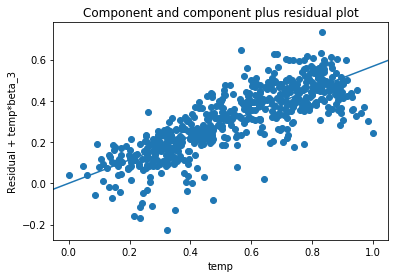

In [102]:
# Model Validation

 # Linear Relationship

sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()   

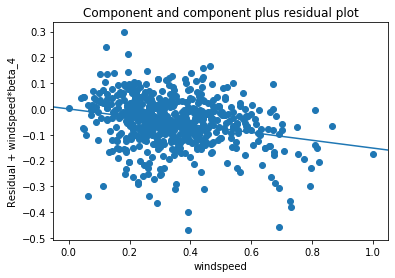

In [103]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

In [104]:
# The above 2 plots shows that the relationship between the model and the predictor variables and a well preserved linearity.

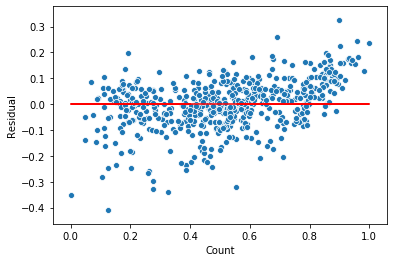

In [105]:
# Homoscedasticity

y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [106]:
# Homoscedasticity is well preserved as there are no visible pattern in the residual values.

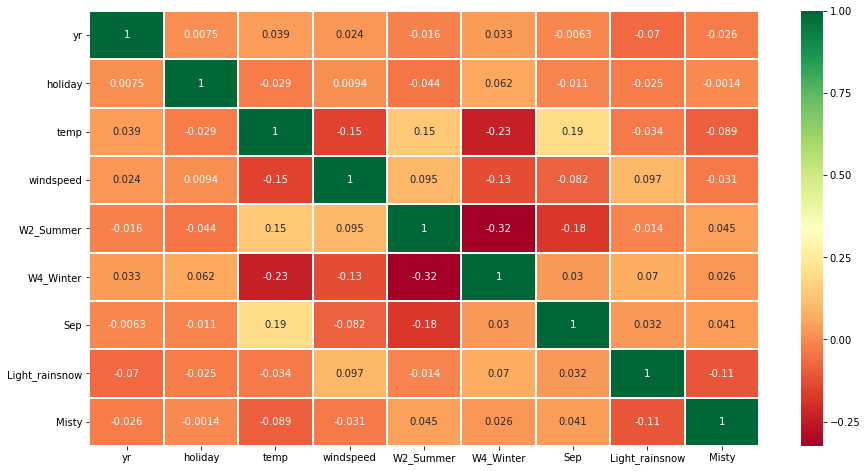

In [107]:
# Absence of Multicolinearity

# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [108]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.88
3,windspeed,3.54
0,yr,1.99
4,W2_Summer,1.57
8,Misty,1.47
5,W4_Winter,1.35
6,Sep,1.20
7,Light_rainsnow,1.06
1,holiday,1.03


In [109]:
# Independence of residuals

print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 1.9951


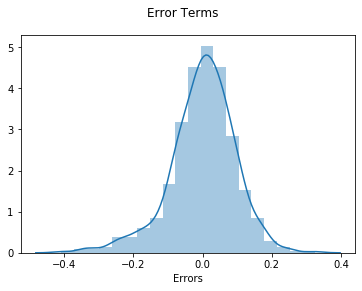

In [110]:
# Normality of error

res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

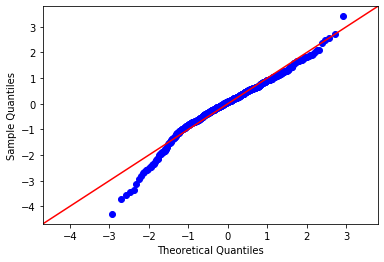

In [111]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

In [112]:
# Making Predictions using final model

# Scaling bike_test dataframe

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,1,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,1,0,0


In [113]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.458904,0.041096,0.684932,0.532675,0.509858,0.669652,0.352503,0.492836,0.253425,0.219178,...,0.095890,0.068493,0.047945,0.335616,0.157534,0.150685,0.130137,0.150685,0.136986,0.136986
std,0.500024,0.199195,0.466142,0.231323,0.218944,0.144037,0.163710,0.217736,0.436469,0.415114,...,0.295454,0.253460,0.214386,0.473831,0.365558,0.358973,0.337612,0.358973,0.345016,0.345016
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332584,0.317798,0.559740,0.230145,0.340083,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.521309,0.512744,0.660822,0.332679,0.498102,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721975,0.680379,0.762493,0.436244,0.633945,0.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.937069,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
# Dividing X_test and y_test

y_test = bike_test.pop('cnt')
X_test = bike_test

In [115]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 22 to 491
Data columns (total 10 columns):
const             146 non-null float64
yr                146 non-null int64
holiday           146 non-null int64
temp              146 non-null float64
windspeed         146 non-null float64
W2_Summer         146 non-null uint8
W4_Winter         146 non-null uint8
Sep               146 non-null uint8
Light_rainsnow    146 non-null uint8
Misty             146 non-null uint8
dtypes: float64(3), int64(2), uint8(5)
memory usage: 7.6 KB


In [116]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

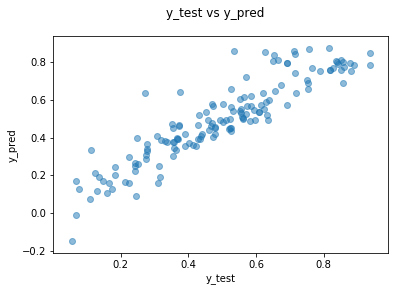

In [117]:
# Model Evaluation

# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [118]:
# R2 Value Calculation for bike_test dataframe

r2 = round(r2_score(y_test, y_pred),4)
r2

0.8208

In [119]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8089

In [120]:
# Calculating RMSE for the selected Model

MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0701